In [1]:
import sys
sys.path.append('../')
import numpy as np
import matplotlib
import pylab as plt

In [2]:
import gunnar
from gunnar.core import Device

import hallgerd
from hallgerd.core import Sequential
from hallgerd.layers import Dense

In [3]:
def xor(x1, x2):
    if 1 / (x1 * x1) + 1 / (x2 * x2) > 4:
#     if x1*x1 + x2*x2 < 3:
        return 1
    return 0

vxor = np.vectorize(xor)
X = np.random.randn(10000, 2, )
y = vxor(X[:, 0], X[:, 1])
X = X.T
y = y.reshape((1, -1))

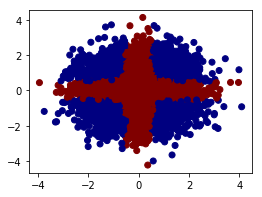

In [4]:
plt.figure(figsize=(4,3))
plt.scatter(X[0], X[1], c=y[0], cmap=matplotlib.cm.jet)
plt.show()

In [5]:
devices = Device.getDevices()
[k for k in devices]

['Intel(R) Gen9 HD Graphics NEO',
 'pthread-Intel(R) Core(TM) i3-7100U CPU @ 2.40GHz']

In [6]:
cldevice = Device([devices['Intel(R) Gen9 HD Graphics NEO']])
model = Sequential(device=cldevice ,lr=0.002, batch_size=256, epochs=64, verbose=True)
model.add(Dense(2, 4))
model.add(Dense(4, 1))

In [7]:
model.fit(X, y)

100%|██████████| 64/64 [00:37<00:00,  1.72it/s]


In [8]:
ypp = model(X)[0]
yp = np.zeros(X.shape[1])
for i in range(X.shape[1]):
    yp[i] = 1 if ypp[i] >= 0.5 else 0

In [9]:
np.min(ypp), np.max(ypp)

(0.09137003, 0.99748534)

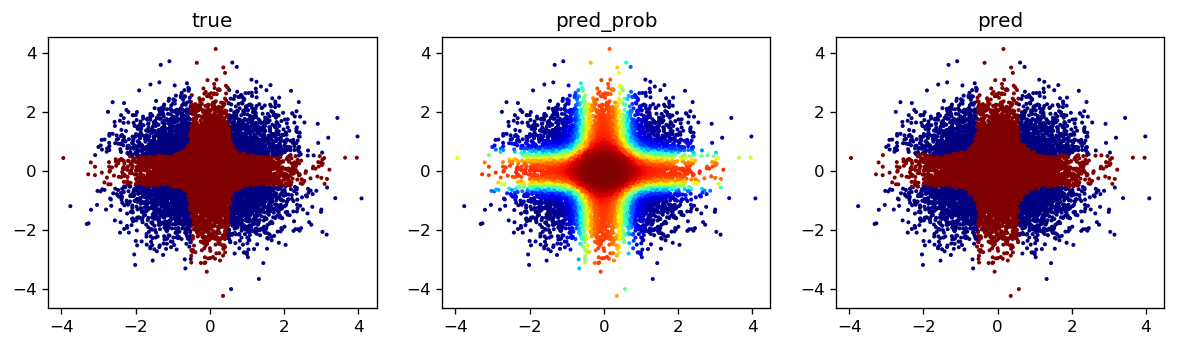

In [10]:
fig, ax = plt.subplots(ncols=3, figsize=(12,3), dpi=120)
ax[0].scatter(X[0], X[1], c=y[0], s=2, cmap=matplotlib.cm.jet)
ax[1].scatter(X[0], X[1], c=ypp, s=2, cmap=matplotlib.cm.jet)
ax[2].scatter(X[0], X[1], c=yp, s=2, cmap=matplotlib.cm.jet)
ax[0].set_title('true')
ax[1].set_title('pred_prob')
ax[2].set_title('pred')
plt.show()

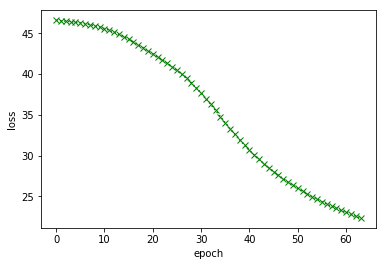

In [11]:
plt.plot(model.history['loss'], 'gx:')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()